In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import os
import dense_net

Using TensorFlow backend.


In [3]:
path = 'C:/Pictures/dataset/'
ds = pd.read_csv('dataset.csv')
ds.head()

,id,category
0,river07.tif,2
1,golfcourse05.tif,0
2,beach17.tif,1
3,river31.tif,2
4,river77.tif,2


In [4]:
print("Number of samples: ",len(ds))
print("Number of Labels: ",np.unique(ds.category))

Number of samples:  300
Number of Labels:  [0 1 2]


In [5]:
from PIL import Image 
from skimage.transform import resize
train_images=[]
for i in ds.id:
    image=plt.imread(path+i)
    image = resize(image, (224, 224, 3))
    train_images.append(image)

train_images=np.asarray(train_images)
X=train_images
y=ds.category
print("Images: ", X.shape)

Images:  (300, 224, 224, 3)


In [6]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16)
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (252, 224, 224, 3)
y_train shape :  (252, 3)
X_test shape :  (48, 224, 224, 3)
y_test shape :  (48, 3)


In [7]:
from keras.optimizers import Adam
classes = 3
model = dense_net.dense_net(classes)

# training
batch_size = 20
epochs = 10
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
#shuffle = False because images are already shuffled manually
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Train on 252 samples, validate on 48 samples
Epoch 1/10
252/252 [==============================] - 24s - loss: 4.0377 - categorical_accuracy: 0.4643 - val_loss: 1.0070 - val_categorical_accuracy: 0.4375
Epoch 2/10
252/252 [==============================] - 24s - loss: 1.0380 - categorical_accuracy: 0.3929 - val_loss: 1.0684 - val_categorical_accuracy: 0.4583
Epoch 3/10
252/252 [==============================] - 25s - loss: 1.0116 - categorical_accuracy: 0.4365 - val_loss: 0.9498 - val_categorical_accuracy: 0.3958
Epoch 4/10
252/252 [==============================] - 24s - loss: 0.8690 - categorical_accuracy: 0.5079 - val_loss: 0.8893 - val_categorical_accuracy: 0.7500
Epoch 5/10
252/252 [==============================] - 24s

In [8]:
model.save('dense_net_model.h5')

In [9]:
from sklearn import metrics
label_pred = model.predict(X_test)

pred = []
for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(y_test, axis=1)

print(metrics.classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.81      0.87      0.84        15
           2       0.81      0.72      0.76        18

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48



In [10]:
wrong_images = []
true_labels = []
wrong_labels = []
for i in range(len(pred)):
    if (Y_test[i] != pred[i]):
        wrong_images.append(X_test[i])
        true_labels.append(Y_test[i])
        wrong_labels.append(pred[i])
    if (len(wrong_images) == 4):
        break

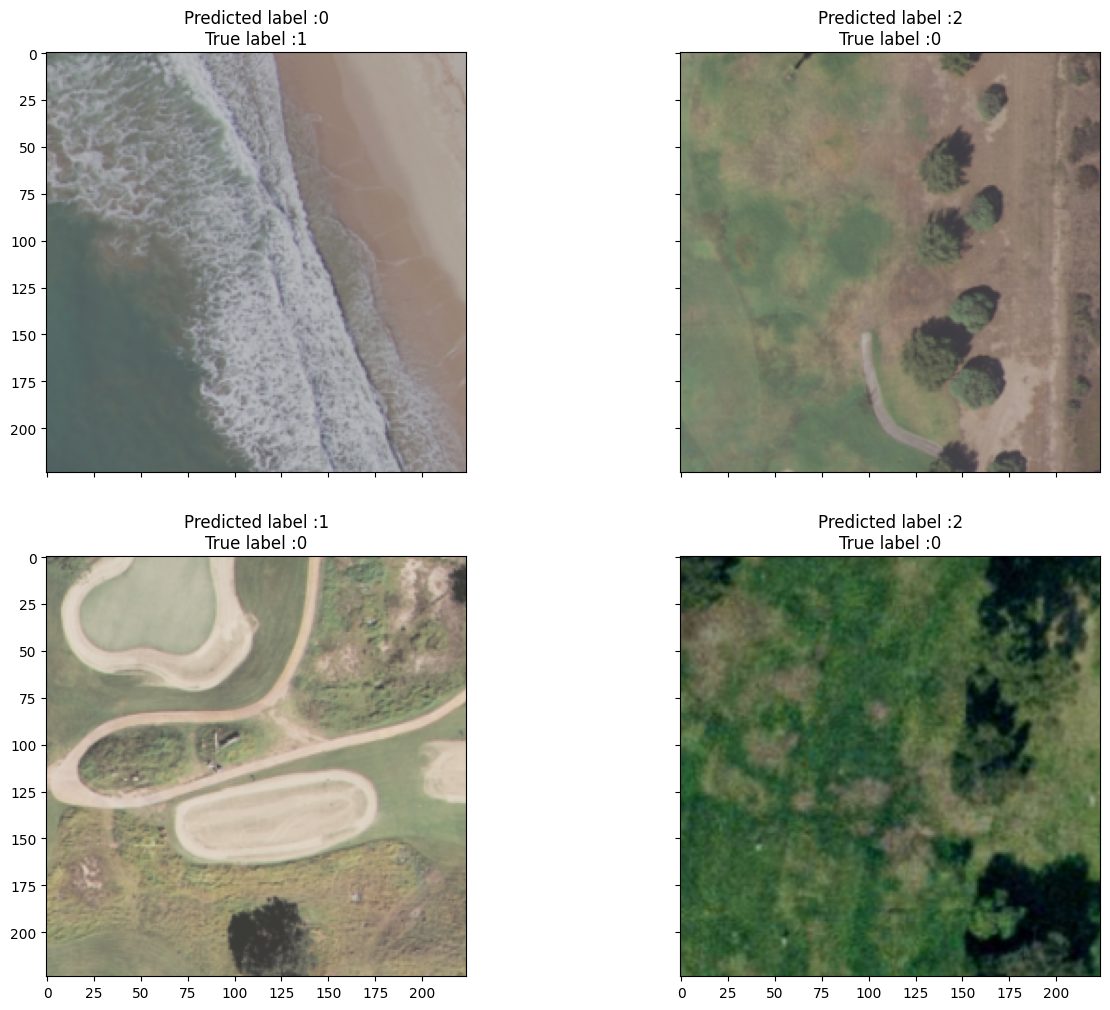

In [11]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(wrong_images[n])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(wrong_labels[n], true_labels[n]))
            n += 1